# Linear Regression
`Regression is a statistical way to establish a relationship between a dependent variable and a set of independent variable(s). Linear regression is a technique where we try to fit a linear equation on a graph plot such that the line passes through the data points in a **general** manner`. 

Find the relation between x and y in the following cases: 

**(1,3),(2,6),(3,9),(4,12),(5,15)**.

If X=8, what is Y?

It's 24.

You noticed that y = 3x. So if x = 8, y =24

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import statsmodels.api as sm
import pandas as pd
from sklearn.linear_model import LinearRegression

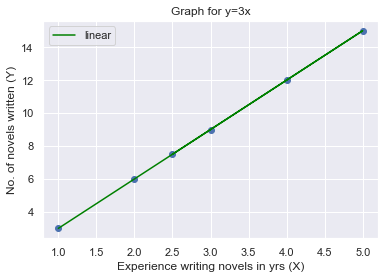

In [2]:
X,Y=[1,2,3,4,5,2.5],[3,6,9,12,15,7.5]
plt.plot(X,Y,label='linear', color='green')
plt.ylabel('No. of novels written (Y)')
plt.xlabel('Experience writing novels in yrs (X)')
plt.scatter(X,Y)
plt.title('Graph for y=3x')
plt.legend()
plt.show()

Let's take one more example:

**(4,8),(6,27),(8,64),(10,125),(12,216).**

If X=16, what is Y?

It's 512. 

Again, your mind was quick to fit the equation **Y=(X/2)<sup>3</sup>**. 

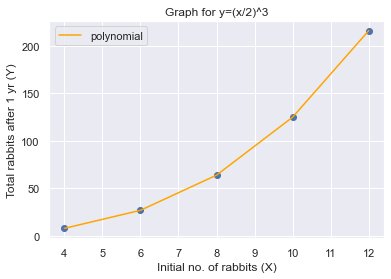

In [3]:
X,Y=[4,6,8,10,12],[8,27,64,125,216]
plt.plot(X,Y,label='polynomial', color='orange')
plt.ylabel('Total rabbits after 1 yr (Y)')
plt.xlabel('Initial no. of rabbits (X)')
plt.scatter(X,Y)
plt.title('Graph for y=(x/2)^3')
plt.legend()
plt.show()

We can take some random data plotted on a graph and then try to fit a linear equation that passes through it.

[4.17022005e+00 7.20324493e+00 1.14374817e-03 3.02332573e+00
 1.46755891e+00 9.23385948e-01 1.86260211e+00 3.45560727e+00
 3.96767474e+00 5.38816734e+00 4.19194514e+00 6.85219500e+00
 2.04452250e+00 8.78117436e+00 2.73875932e-01 6.70467510e+00
 4.17304802e+00 5.58689828e+00 1.40386939e+00 1.98101489e+00
 8.00744569e+00 9.68261576e+00 3.13424178e+00 6.92322616e+00
 8.76389152e+00 8.94606664e+00 8.50442114e-01 3.90547832e-01
 1.69830420e+00 8.78142503e+00 9.83468338e-01 4.21107625e+00
 9.57889530e+00 5.33165285e+00 6.91877114e+00 3.15515631e+00
 6.86500928e+00 8.34625672e+00 1.82882773e-01 7.50144315e+00
 9.88861089e+00 7.48165654e+00 2.80443992e+00 7.89279328e+00
 1.03226007e+00 4.47893526e+00 9.08595503e+00 2.93614148e+00
 2.87775339e+00 1.30028572e+00]


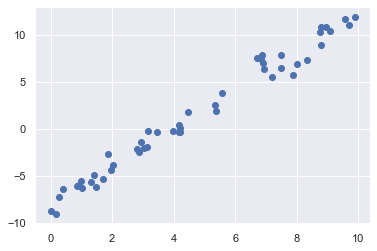

In [4]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
print(x)
y = 2 * x - 8 + rng.randn(50)
plt.scatter(x, y);

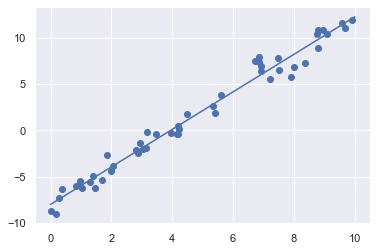

In [5]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)
# What is np.newaxis? Stack Overflow: https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

This is the intuition behind regression. First example was the case for **linear regression**, whereas second example was a case of **polynomial regression**.



This is one of the algorithms we try to replicate in machine learning. As we already know by now, machine learning, in layman words, is a way in which we show the machine some outputs and then ask the machine to predict what the input should be, so that the desired output is yielded.




Using this **most suitable line** predicted by the machine, it will try to fit or predict input for new/future outputs.




In the examples seen above, Y is the *dependent variable* whereas X is the *independent variable*. 

We all are aware about the equation of a line:

## <center>*y=mx+c*</center>
where 
m=slope, c=intercept

In machine learning, we need to adjust these **m and c** to fit the right line. These are known as **_hyper-parameters_**. 

Tweaking these values will help us predict the generalized line that will pass through **most** of the data and understand a general pattern.



But how do you define best fit? What are the parameters on the basis of which a line is defined as **best-fit**?

We see the difference between actual and predicted. At each iteration, we compute the sum of "error", i.e. the difference of the predicted value and actual value. and then try to minimise that sum. This is the working of linear regression.

_The best fit line is the one with such values of 'm' and 'c' such that it produces least error for all pairs (X,Y)._


But the question is, for how many values of (m,c) can we check in an infinite space? The answer to that is Gradient Descent, something we will learn in detail in next few hours. I will just leave a simple formula to get your "neurons" activated. 

In this gradient descent method, we will try to predict values of 'm' and 'c'. We will compute "loss" function that will tell us how far we are from the destination/minima and then accordingly update our 'm' and 'c' by adjusting it with a derivative term.

Let's see our loss function first. Here, we will use "mean squared error function".


<figure>
<center>
<img src='https://drive.google.com/uc?id=12_-islxcYpkrd8rz1Lhq4p1kHNGLjmq4'/>
  <figcaption><b></b></figcaption></center>
</figure>

Our goal is to "minimise" this loss function so that we are as close as possible to our destination value. We know that to minimise a function, we can use differentiation. Let's see how that works.



So, now let's see how our derivative will look like wrt m and c.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1kXHifeCE9FZS-a53qaVq17JrFywcbQSt'/>
  <figcaption><b></b></figcaption></center>
</figure>


<figure>
<center>
<img src='https://drive.google.com/uc?id=1lihxJkQsR1bbKdk6xL3zwoflctMd7knz'/>
  <figcaption><b></b></figcaption></center>
</figure>


So, now we need to update our existing 'm' and 'c' values in this way:

m(t+1) = f(m(t), error(t))


c(t+1) = f(c(t), error(t))


<figure>
<center>
<img src='https://drive.google.com/uc?id=1o4An1V6RpC6O0cLQIbOGfYfqjbF-qsfF'/>
  <figcaption><b></b></figcaption></center>
</figure>


Epoch 0


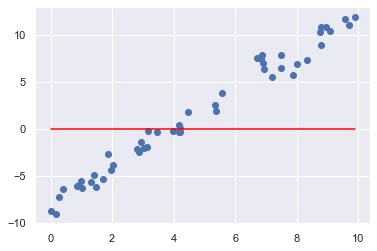

Epoch 100


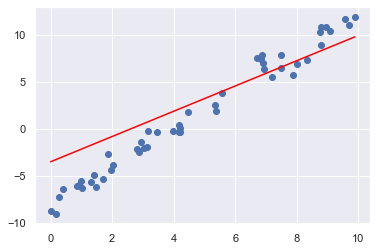

Epoch 200


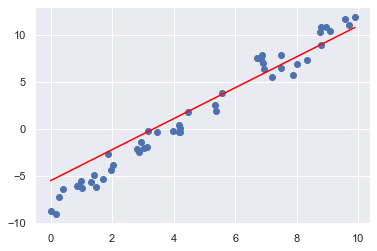

Epoch 300


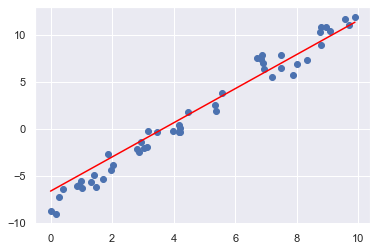

Epoch 400


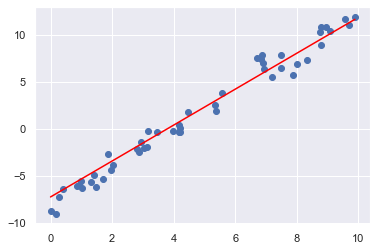

Epoch 500


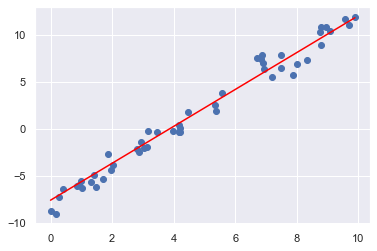

Epoch 600


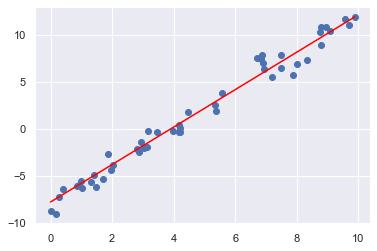

Epoch 700


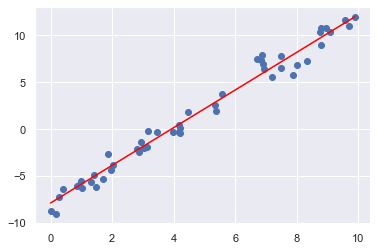

Epoch 800


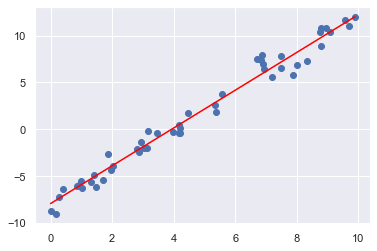

Epoch 900


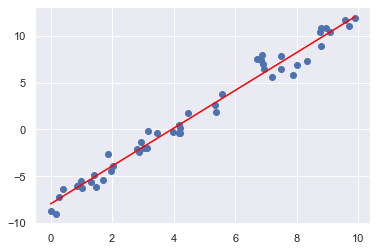

2.0237458789741014 -7.975712096876741


In [6]:
m = 0
c = 0

L = 0.001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*x + c  # The current predicted value of Y
    D_m = (-2/n) * sum(x * (y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    if i%100==0:
      print("Epoch {}".format(i))
      plt.scatter(x,y) 
      plt.plot([min(x), max(x)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
      plt.show()
    
print (m, c)


Let's see the gradient descent in action, how it fits the line.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1kmdiIzpzXHmbp9UCJX6e3_BqIrqKxy5L'/>
  <figcaption><b>Simulation of Linear Regression using Gradient Descent</b></figcaption></center>
</figure>


But for the sake of linear regression, we have mathematical formulas that help determine the best fit line which you guys will learn in 4th semester/already know. 


Note that we are only dealing with X and Y. If we deal with more independent variables, then we deal with something known as **multi linear regression**.


<figure>
<center>
<img src='https://drive.google.com/uc?id=16c8UEoUNQH4xk7SrGOHn-hXW0o7xasCG'/>
  <figcaption><b></b></figcaption></center>
</figure>

In real life, we deal with cases where a variable depends on more than one independent variables. This is known as **multi variate linear regression**.



Now let's code an example on multi linear regression using a library in Python called **[sklearn](https://scikit-learn.org/stable/)**. 



In this section, we will discuss the basic of using multi variate linear regression on the diabetes dataset.

In [7]:
#Importing the required libraries

import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn import datasets

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [8]:
diabetes=datasets.load_diabetes() #loading the diabetes dataset into a variable

In [9]:
print(diabetes.data.shape) # feature shape
# 442 patients, 10 variables
print(diabetes.target.shape)
print(diabetes.feature_names) 
#s1....s6 indicate 6 blood serum measurements
print(diabetes.DESCR)

(442, 10)
(442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum 

Linear Regression assumes the following model:

## <center>y=Xβ+c+ϵ </center>

X: data 

β: coefficients 

c: intercept 

ϵ: error, cannot be explained by model 

y: target 

In [10]:
# Sperate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2) #80-20 split

In [11]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [12]:
model.predict(X_test)

array([196.57281744, 122.1361016 , 113.5304794 , 124.60470137,
       180.21580157, 166.18526138, 175.76906728, 233.99764755,
        93.84238555,  96.87507373, 185.41996812,  58.37043294,
       186.51434844, 116.70051987,  59.79770123,  47.89405392,
       124.37425504,  63.51901164, 270.69547898, 177.73876677,
       172.27788099, 202.26827062, 218.89639443, 126.79424089,
       142.85335403,  86.67306023, 188.50922014,  85.52347947,
       114.35768822,  91.50600881, 195.31770393, 161.88258134,
       115.34733385, 172.34459834, 155.7848069 , 185.18843618,
       160.16312909, 111.07373959, 160.11457812, 177.18367837,
       179.95152048, 159.14156092, 149.97677311, 159.86093697,
       117.57115612, 184.65537155, 140.18506125, 155.94182724,
       124.34726714, 208.3072719 , 125.2178245 , 216.2132381 ,
       135.15369165, 159.20919057,  55.4429754 , 156.29359305,
       200.51418536, 184.03981636, 213.23602488, 118.75975895,
       110.03058154, 112.51712305, 168.2103977 , 205.50

In [13]:
X_train = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     38.54
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           2.74e-50
Time:                        12:04:37   Log-Likelihood:                -1901.5
No. Observations:                 353   AIC:                             3825.
Df Residuals:                     342   BIC:                             3867.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.6187      2.862     52.975      0.0

References:

1. https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931